In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
sns.set(style="white", color_codes=True)
import plotly.graph_objects as go
from joblib import parallel_backend
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import precision_score,f1_score

import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool

from wordcloud import WordCloud 
import missingno as msno


In [2]:
#mobile games
data= pd.read_csv("appstore_games.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
delete_columns = ['URL', 'ID', 'Description', 'Languages']
data = pd.read_csv("appstore_games.csv")
data = data.drop(columns=delete_columns)
new_data = 'new_games_data.csv'
data.to_csv(new_data, index=False)
data.head()

,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,Kiss The Machine,4+,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Bayou Games,4+,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4+,21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,RoGame Software,4+,34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


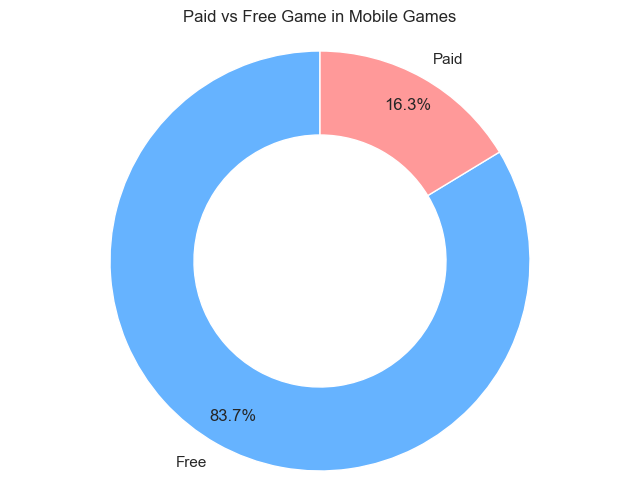

In [4]:

paid_games = data[data['Price'] > 0]
free_games_count = len(data[data['Price'] == 0])
paid_games_count = len(paid_games)

colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(8, 6))
plt.pie([free_games_count, paid_games_count], labels=['Free', 'Paid'], colors=colors,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title('Paid vs Free Game in Mobile Games')
plt.axis('equal') 
plt.show()


In [5]:
top_10_game_genres = data["Primary Genre"].value_counts().head(10)
top_10_game_genres


Games            16286
Education          222
Entertainment      198
Utilities           77
Sports              60
Reference           32
Stickers            29
Finance             18
Business            16
Productivity        15
Name: Primary Genre, dtype: int64

<Axes: title={'center': 'Top 10 Mobil Primary Game Genres'}>

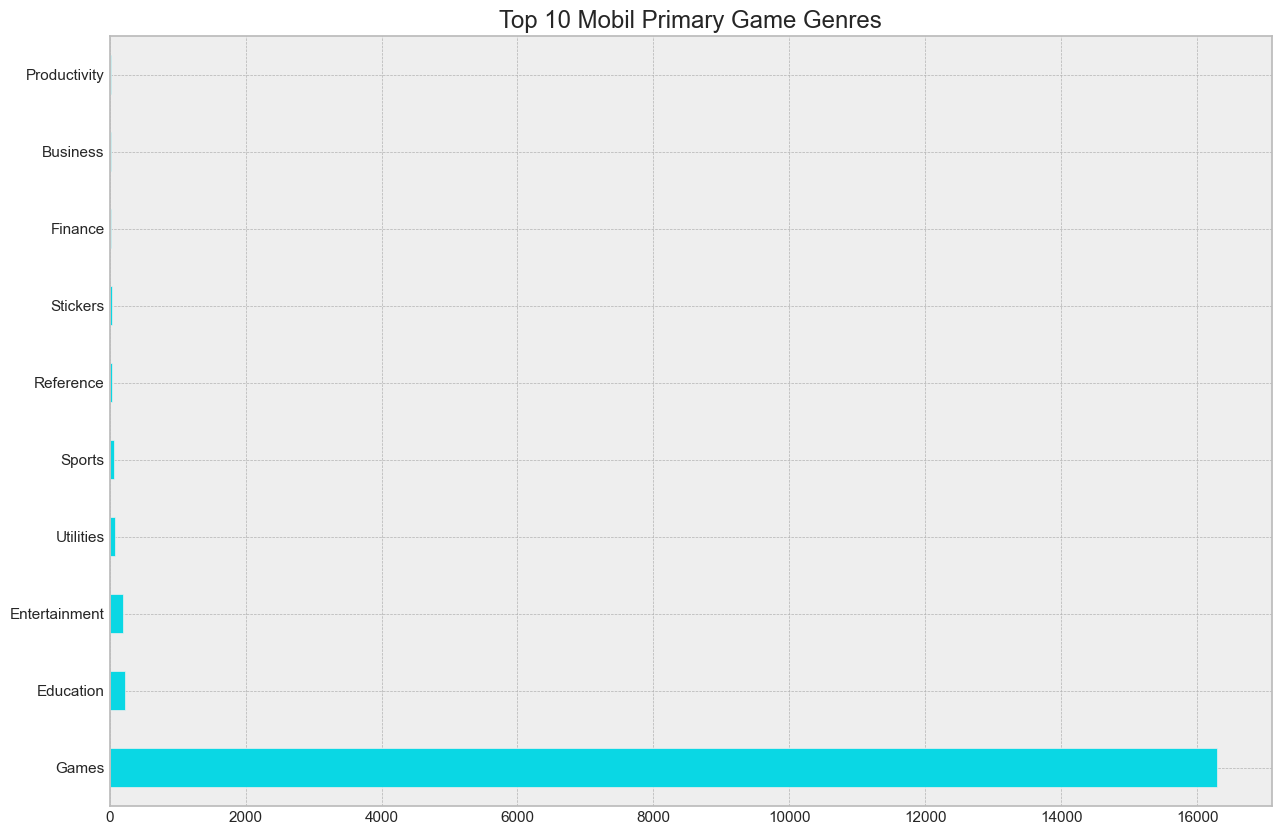

In [6]:
plt.style.use("bmh")
plt.figure(figsize=(15,10))
top_10_game_genres.plot(kind="barh",color="#0AD7E4",title="Top 10 Mobil Primary Game Genres")

In [7]:
top_10_game_genres_two = data["Genres"].value_counts().head(10)
top_10_game_genres_two


Games, Strategy, Puzzle                   778
Games, Puzzle, Strategy                   694
Games, Strategy                           588
Games, Strategy, Action                   483
Games, Simulation, Strategy               465
Games, Strategy, Simulation               462
Games, Action, Strategy                   421
Games, Strategy, Puzzle, Entertainment    357
Games, Puzzle, Strategy, Entertainment    342
Games, Strategy, Casual                   339
Name: Genres, dtype: int64

<Axes: title={'center': 'Top 10 Mobil Game Genres'}>

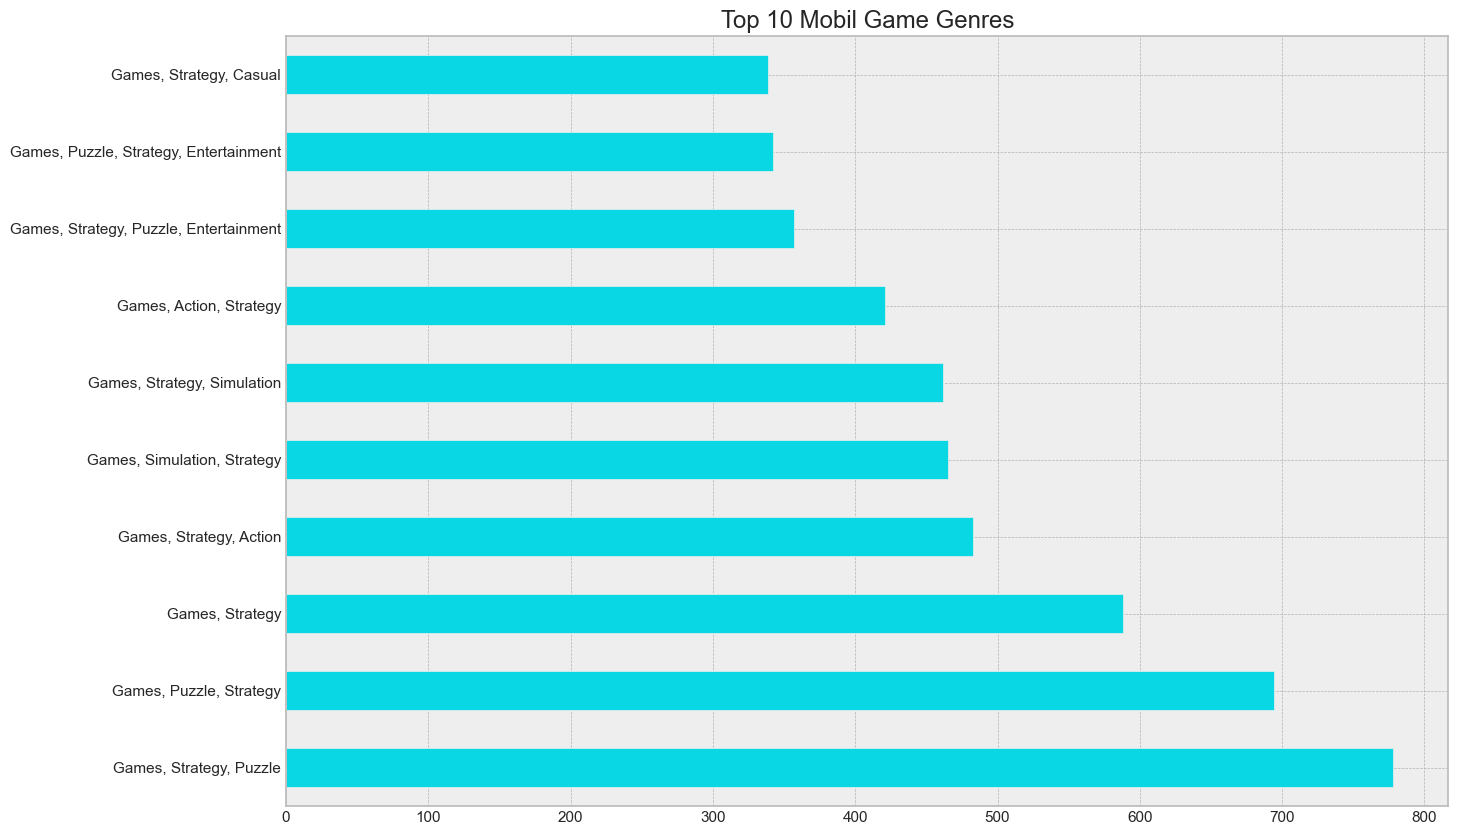

In [46]:
plt.style.use("bmh")
plt.figure(figsize=(15,10))
top_10_game_genres_two.plot(kind="barh",color="#0AD7E4",title="Top 10 Mobil Game Genres")

        Primary Genre  Average User Rating
0                Book             4.300000
1            Business             3.000000
2           Education             4.152174
3       Entertainment             3.831522
4             Finance             4.062500
5        Food & Drink             5.000000
6               Games             4.065903
7    Health & Fitness             4.500000
8           Lifestyle             3.125000
9             Medical             3.000000
10              Music             4.500000
11         Navigation             4.000000
12               News             4.750000
13       Productivity             3.250000
14          Reference             3.361111
15           Shopping             4.500000
16  Social Networking             3.833333
17             Sports             4.217391
18           Stickers             3.666667
19             Travel             3.500000
20          Utilities             4.056818


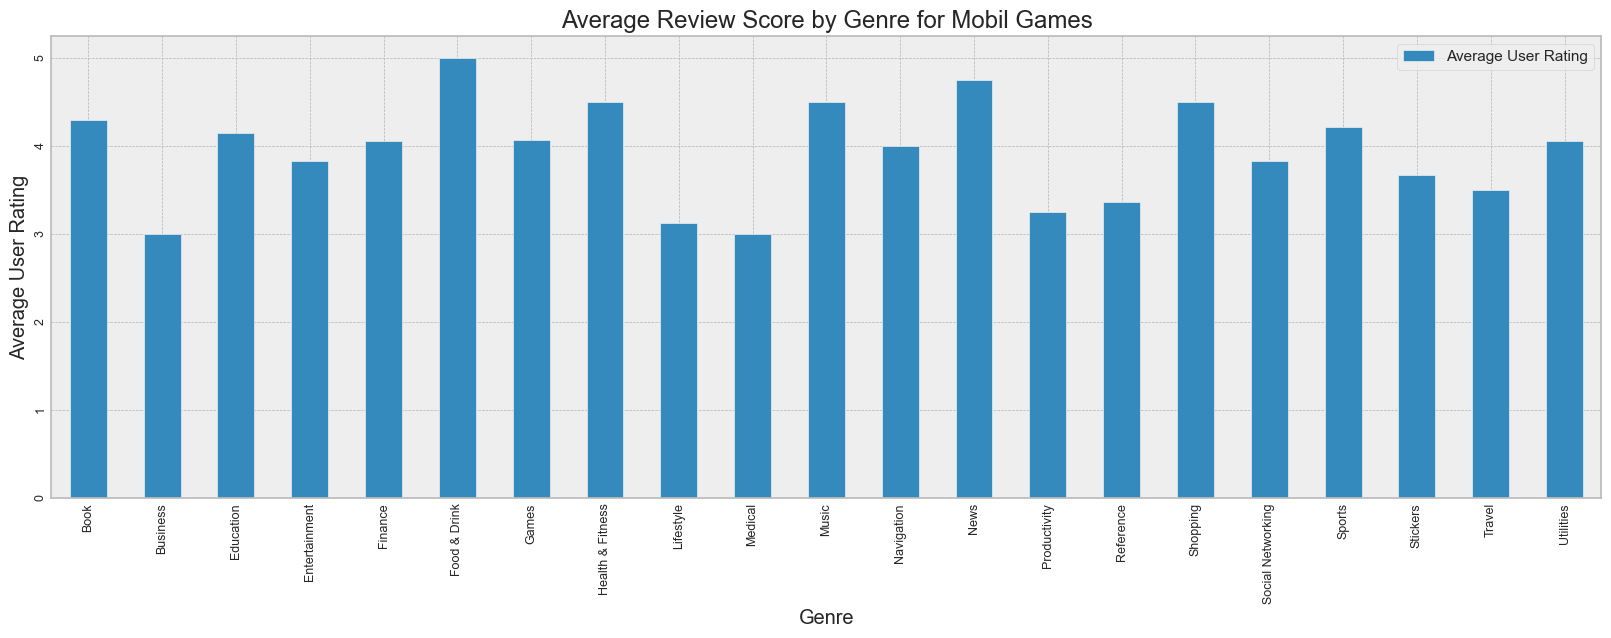

In [84]:
data['Primary Genre'] = data['Primary Genre'].apply(lambda x: x.split(';')[0])

# Calculate average review score for each genre
genre_scores = data.groupby('Primary Genre')['Average User Rating'].mean().reset_index()
print(genre_scores)

# Adjust figure size
plt.figure(figsize=(20, 6))

# Create axes explicitly
ax = plt.gca()

# Bar chart of average review score by genre
genre_scores.plot.bar(x='Primary Genre', y='Average User Rating', rot=0, title="Average Review Score by Genre for Mobil Games", ax=ax)

ax.tick_params(rotation=90, labelsize=9)
ax.set_xlabel("Genre")
ax.set_ylabel("Average User Rating")

# Show the plot
plt.show()

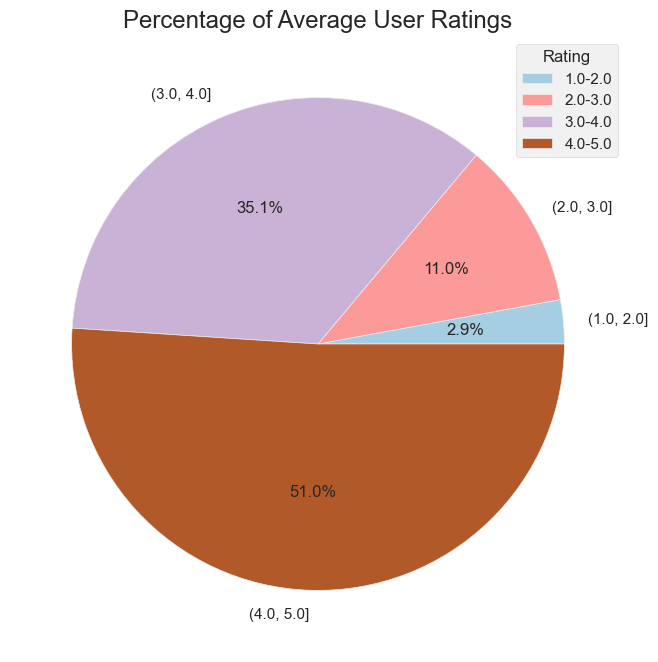

In [47]:
column_name = "Average User Rating"
bin_size = 1
bins = np.arange(min(data[column_name]), max(data[column_name]) + bin_size, bin_size)
data['range'] = pd.cut(data[column_name], bins=bins)
grouped_data = data.groupby('range').size()
percentages = (grouped_data / grouped_data.sum()) * 100
colors = plt.cm.Paired(np.linspace(0, 1, len(bins)-1))

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.legend(title="Rating", labels=[f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)], loc="upper right")
plt.title('Percentage of Average User Ratings')
plt.show()


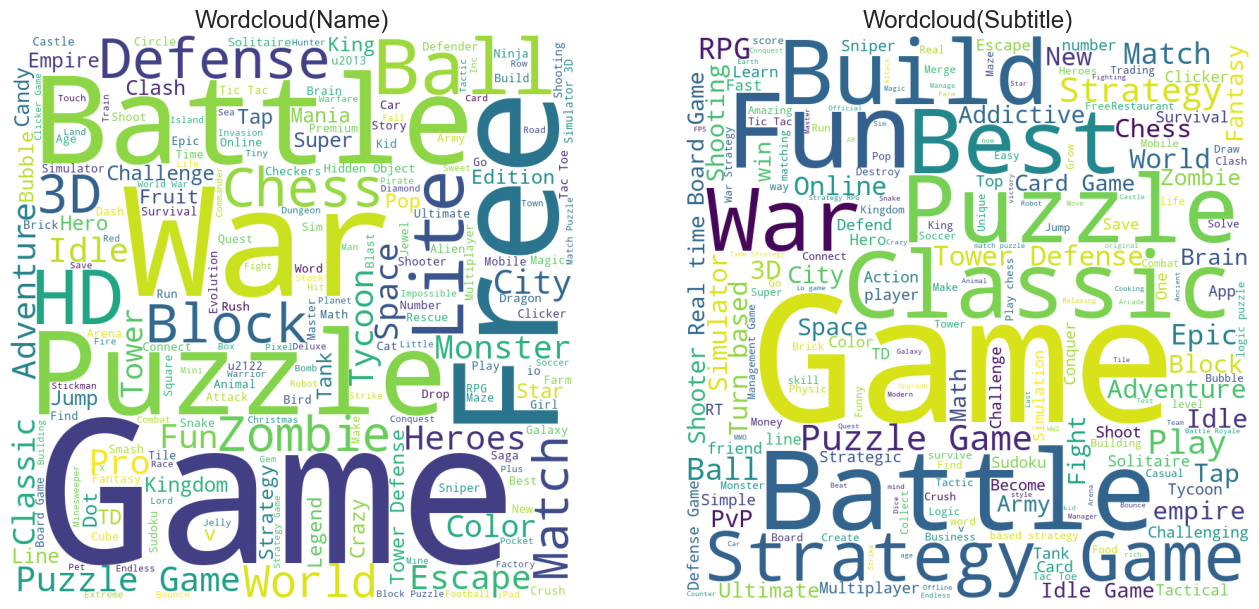

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

In [50]:
#computer games
data2= pd.read_csv("steam.csv")
data2.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [77]:
df = pd.DataFrame(data2)
df['ortalama_puan'] = (df['positive_ratings'] - df['negative_ratings']) / (df['positive_ratings'] + df['negative_ratings'])
print(df)

         appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher          platforms  \
0                   Valve                 Valve  windows;mac;linux   
1                   Valve                 V

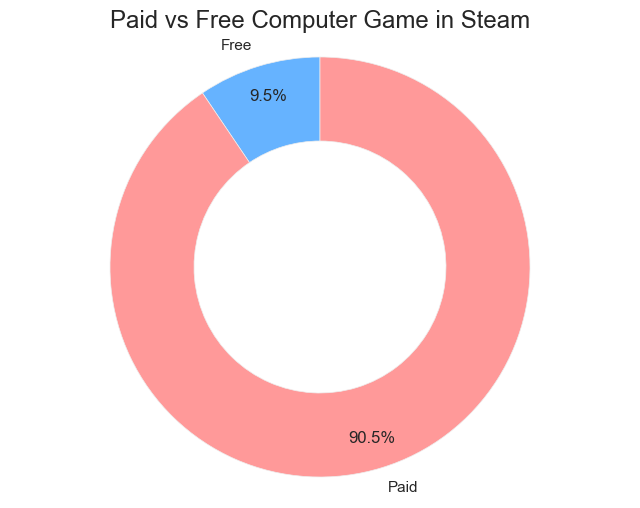

In [68]:
paid_games = data2[data2['price'] > 0]
free_games_count = len(data2[data2['price'] == 0])
paid_games_count = len(paid_games)

colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(8, 6))
plt.pie([free_games_count, paid_games_count], labels=['Free', 'Paid'], colors=colors,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title('Paid vs Free Computer Game in Steam')
plt.axis('equal')
plt.show()

In [69]:
top_10_game_genres2 = data2["genres"].value_counts().head(10)
top_10_game_genres2

Action;Indie              1852
Casual;Indie              1482
Action;Adventure;Indie    1229
Adventure;Indie           1170
Action;Casual;Indie       1004
Action                     843
Adventure;Casual;Indie     801
Indie                      759
Casual                     560
Adventure                  535
Name: genres, dtype: int64

<Axes: title={'center': 'Top 10 Computer Game Genres'}>

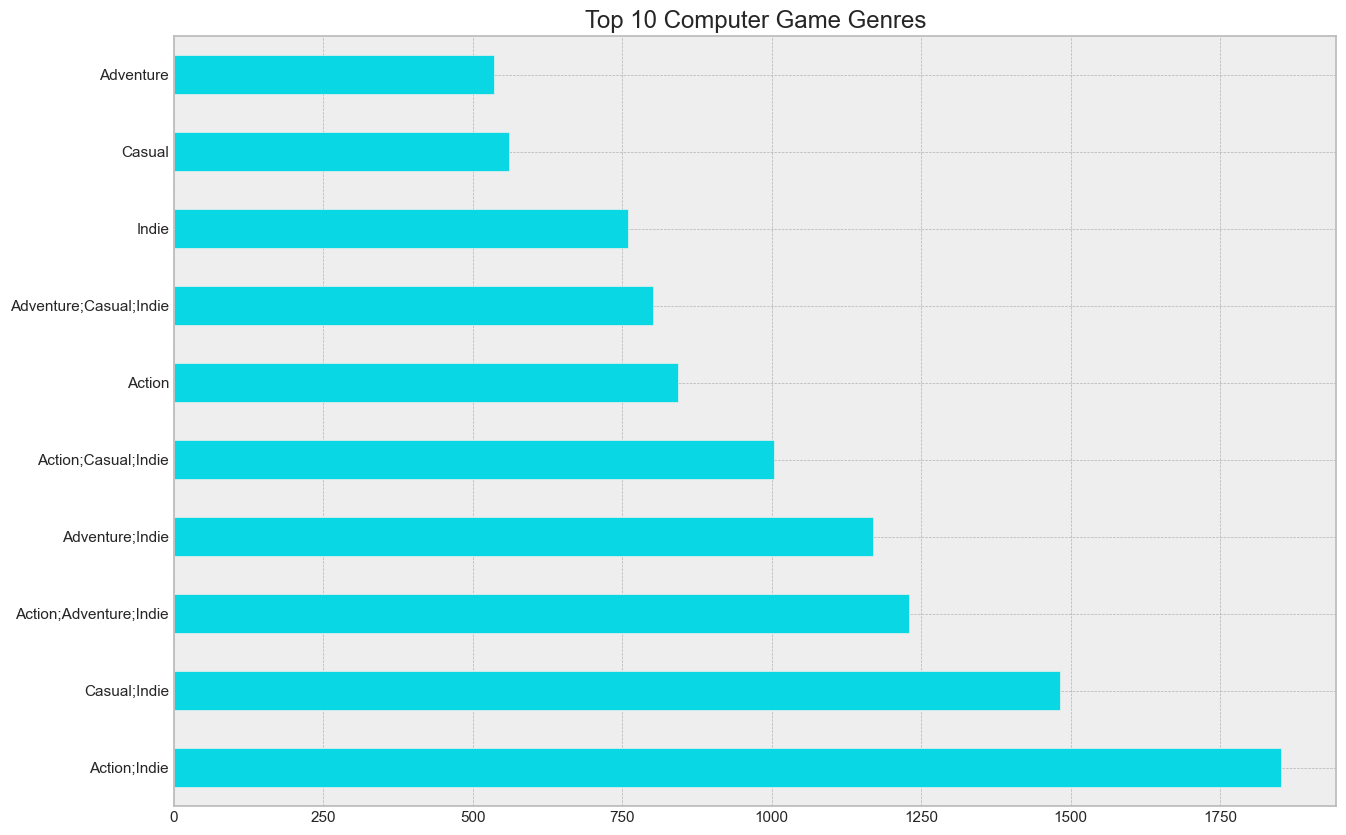

In [70]:
plt.style.use("bmh")
plt.figure(figsize=(15,10))
top_10_game_genres2.plot(kind="barh",color="#0AD7E4",title="Top 10 Computer Game Genres")

                    genre  positive_ratings
0              Accounting          7.000000
1                  Action       1660.728505
2               Adventure        441.552511
3    Animation & Modeling       1341.863636
4        Audio Production         47.750000
5                  Casual        208.143380
6   Design & Illustration        298.107143
7            Early Access         43.444444
8               Education         37.428571
9            Free to Play        791.263291
10                   Gore        127.000000
11                  Indie        728.574533
12  Massively Multiplayer       3067.000000
13                 Nudity        877.633929
14          Photo Editing         17.000000
15                    RPG       2611.759214
16                 Racing        988.548223
17         Sexual Content        571.975510
18             Simulation        844.416799
19      Software Training        138.000000
20                 Sports        180.180723
21               Strategy       

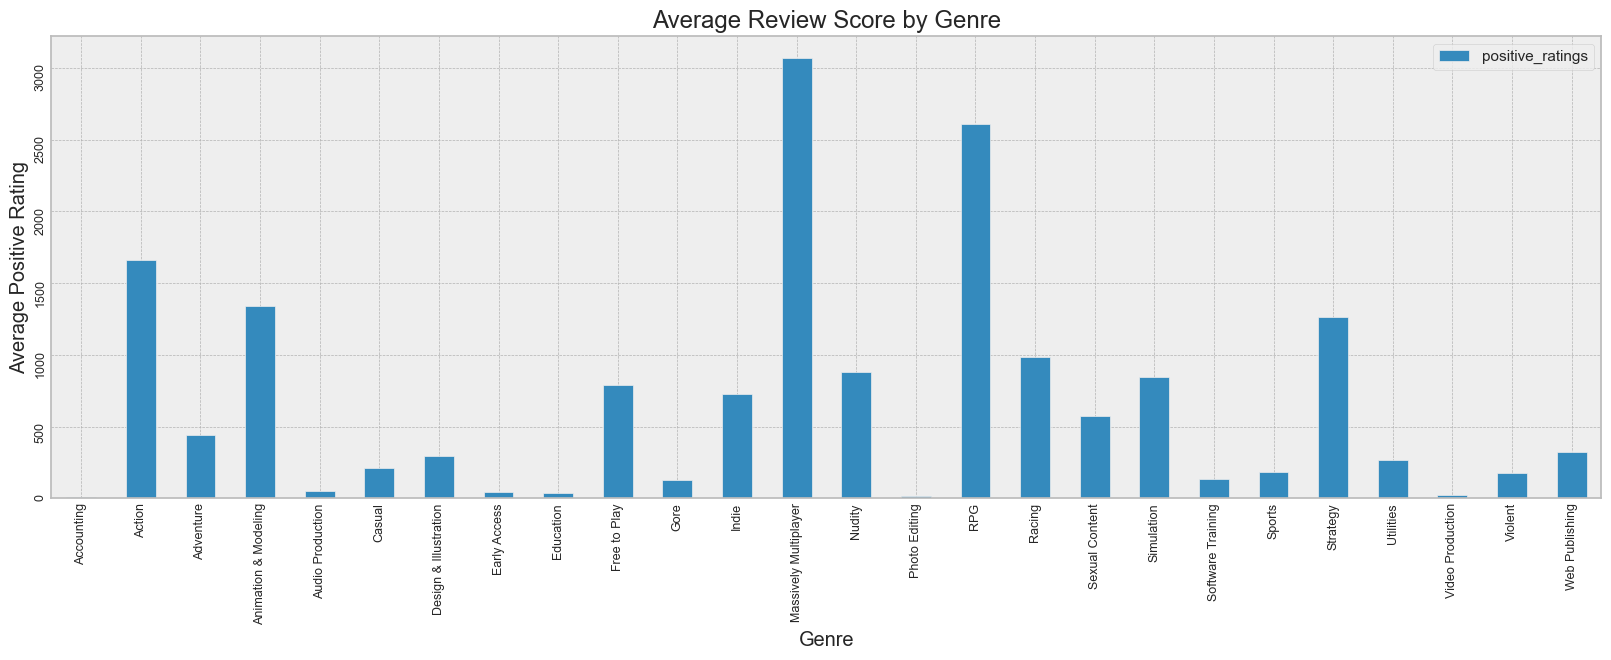

In [80]:
data2['genre'] = data2['genres'].apply(lambda x: x.split(';')[0])

genre_scores = data2.groupby('genre')['positive_ratings'].mean().reset_index()
print(genre_scores)
plt.figure(figsize=(20, 6))
ax = plt.gca()
genre_scores.plot.bar(x='genre', y='positive_ratings', rot=0, title="Average Review Score by Genre", ax=ax)

ax.tick_params(rotation=90, labelsize=9)
ax.set_xlabel("Genre")
ax.set_ylabel("Average Positive Rating")

plt.show()